In [1]:
import warnings
warnings.filterwarnings("ignore")
# Augmenter la densité de pixel
import matplotlib as mpl
import scipy.stats as scpstats
mpl.rcParams['figure.dpi'] = 100
from croscor import *
import csv
band1 = np.load("../data/band1.npy")
band2 = np.load("../data/band2.npy")

#

In [2]:
cwd = os.getcwd()
os.chdir("../data/"+str(85)+"ROI/")
rez = os.popen('ls -t').read()
os.chdir(cwd)
print(rez)

indcsROI_PAR01_1.dat
indcsROI_PAR01_2.dat
indcsROI_PAR01_3.dat
indcsROI_PAR01_4.dat
indcsROI_PAR02_1.dat
indcsROI_PAR02_2.dat
indcsROI_PAR02_3.dat
indcsROI_PAR02_4.dat
indcsROI_PAR03_1.dat
indcsROI_PAR03_2.dat
indcsROI_PAR03_3.dat
indcsROI_PAR03_4.dat
indcsROI_PAR04_1.dat
indcsROI_PAR04_2.dat
indcsROI_PAR04_3.dat
indcsROI_PAR04_4.dat
indcsROI_PAR05_1.dat
indcsROI_PAR05_2.dat
indcsROI_PAR05_3.dat
indcsROI_PAR05_4.dat
indcsROI_PAR06_1.dat
indcsROI_PAR06_2.dat
indcsROI_PAR06_3.dat
indcsROI_PAR06_4.dat
indcsROI_PAR07_1.dat
indcsROI_PAR07_2.dat
indcsROI_PAR07_3.dat
indcsROI_PAR07_4.dat
indcsROI_PAR08_1.dat
indcsROI_PAR08_2.dat
indcsROI_PAR08_3.dat
indcsROI_PAR08_4.dat
indcsROI_PAR09_1.dat
indcsROI_PAR09_2.dat
indcsROI_PAR09_3.dat
indcsROI_PAR09_4.dat
indcsROI_PAR10_1.dat
indcsROI_PAR10_2.dat
indcsROI_PAR10_3.dat
indcsROI_PAR10_4.dat
indcsROI_PAR11_1.dat
indcsROI_PAR11_2.dat
indcsROI_PAR11_3.dat
indcsROI_PAR11_4.dat
indcsROI_PAR12_1.dat
indcsROI_PAR12_2.dat
indcsROI_PAR12_3.dat
indcsROI_PAR1

In [ ]:
num = 85
choiceSimple("../data/"+str(num)+"ROI/",all=True)

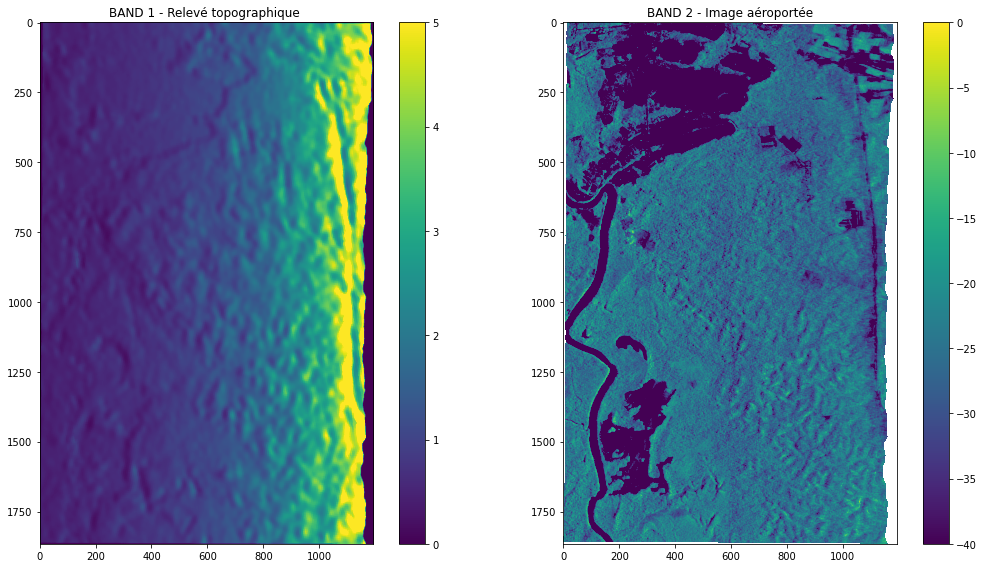

In [19]:
miseEnBouche(band1,band2)

In [20]:
def printRroi():
    margin = 64
    (x0,x1,y0,y1) = (30 + 2 * 256 - margin, 1054 + margin, 215 + 3 * 256, 1751 + margin)
    coord = (x0,x1,y0,y1)
    zone = selection(band2,coord,True)

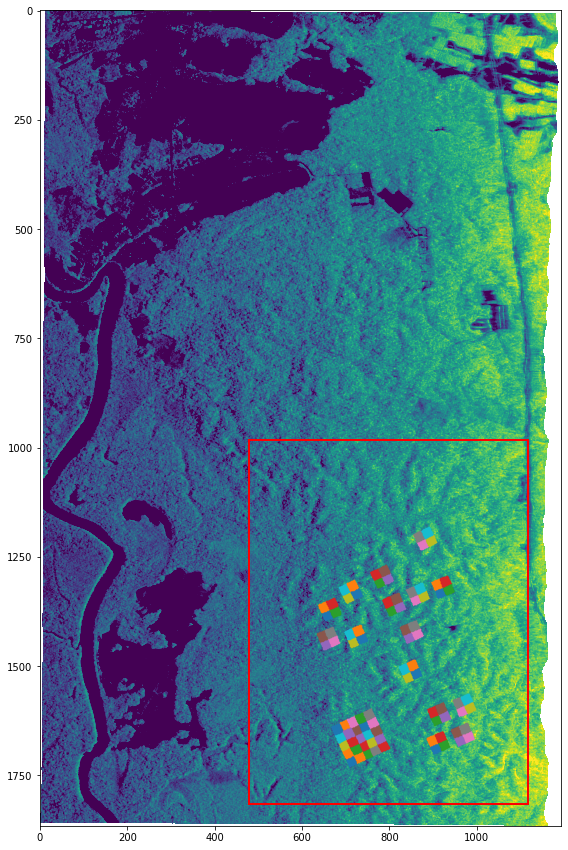

In [21]:
printRroi()

In [22]:
b1,b2 = shiftSelec(band1,band2,15,15)

In [24]:

"""
Vérifier qu'on trouve quelque chose de très proche de 0 après déplacement en refaisant un tour
ok
"""
def multichoice():
    ok = True
    choices = []
    while ok:
        choices.append(choice())
        print('\n #######')
        print("Choices :",choices)
        print('\n #######')
        cin = input('Press Enter to continue or type no')
        if cin == 'no':
            ok = False
    return choices

def apply_displacement(band1,coord,choices):
    img = np.copy(band1)
    (x0,x1,y0,y1) = coord
    imgs = []
    for tabname in choices:  
        features = ExtractFeatures(tabname)
        print(features["ax0"],features["ax1"])
        img = np.roll(np.roll(band1,- int(features["ax0"]),axis=0),- int(features["ax1"]),axis=1)
        tab = np.load(tabname)
        xm = np.mean(tab[0])
        ym = np.mean(tab[1])
        #print((xm,ym))
        img_new = np.roll(np.roll(img, - int(ym),axis=0), int(xm),axis=1)
        imgs.append(img_new)
    imgs.append(band1)
    return imgs#, selection(img_new,coord)


def versus(img1,img2):
    
    fig,ax = plt.subplots(1,2, figsize=(15,8))
    im1 = ax[0].imshow(10*np.log(img1),vmin=-40,vmax=0)
    ax[0].set_title("BAND 1 - original")
    fig.colorbar(im1,ax=ax[0])

    im2 = ax[1].imshow(10*np.log(img2),vmin=-40,vmax=0)
    ax[1].set_title("BAND 1 - déplacement")
    fig.colorbar(im2,ax=ax[1])

    plt.tight_layout()
    plt.show()

def pltBiomass(imgs, choices,num,output = False): #img est l'image corrigée - rapport band2/band1-corrigee
    BiomassData = loadBiomass(num)
    band1 = np.load("../data/band1.npy")
    band2 = np.load("../data/band2.npy")
    pearsonr = []
    Parcels = loadParcels(num)
    plt.figure(1, figsize=(10,5))
    i = 0
    for img in imgs:
        IntensityData = []
        for X in Parcels:
            IntensityZone_X = IntensityZone(X,10*np.log((band2/img)))
            #IntensityZone_X = IntensityZone(X,band2/img)
            IntensityData.append(IntensityZone_X[0])

        sortedData = sortBiomInt(BiomassData,IntensityData)
        if output : 
            print(sortedData)
            print("---------------------------------------------")

        pearsonr.append(scpstats.pearsonr(sortedData[:,0],sortedData[:,1]))
        if i < len(choices):
            features = ExtractFeatures(choices[i])
            label = features
        else:
            label = "ref"
        plt.scatter(sortedData[:,0],sortedData[:,1], label = label)
        i += 1
    plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
    plt.ylim((-30,-10))
    plt.title("Intensité image en fonction de la biomasse sur 16 ROI de forêt")
    plt.xlabel("Qté de biomasse de 16 parcelles (Ordre croissant de qté)")
    plt.xlim((200,500))
    plt.ylabel("Intensité image parcelle")
    plt.savefig("../results/plotMaternelle1.png")
    plt.show()
    
    return pearsonr
    
def main(num):
    (x0,x1,y0,y1) = (30 + 2 * 256, 1054, 215 + 3 * 256, 1751)
    coord = (x0,x1,y0,y1)
    choices = choice()
    imgs = apply_displacement(band1,coord,choices)
    pearson = pltBiomass(imgs,choices,num,False)
    print("\n---------------------------------------------")

    print("\n \n Coefs de pearson :")
    wanted_keys = ['ax0', 'ax1', 'f'] # The keys you want
    for i in range(len(choices)):
        features = ExtractFeatures(choices[i])
        features_list = [(k,features[k]) for k in wanted_keys]
        print(features_list,pearson[i])
        #print(features[, pearson[i])
    print('ref', pearson[-1])
    #pearsonr = plotBiomasse(b1_new)
    #np.save('../decoup/band1_new.npy',b1_new)
    #versus(band2/b1_new,band2/band1)


Liste des résulats disponibles 

0 - 8f_256bs_15sx_6sy_10seuil_99accu.npy
1 - 8f_256bs_15sx_15sy_10seuil_89accu.npy
2 - 8f_256bs_0sx_0sy_10seuil_0accu.npy
3 - band1_new.npy
4 - 4f_256bs_15sx_15sy_10seuil_88accu.npy
5 - 20f_256bs_15sx_15sy_10seuil_89accu.npy
6 - 4f_256bs_15sx_15sy_10seuil_91accu.npy
7 - 3f_256bs_15sx_15sy_10seuil_91accu.npy
8 - 3f_256bs_15sx_15sy_10seuil_95accu.npy
9 - 4f_256bs_15sx_15sy_10seuil_83accu.npy
10 - 2f_256bs_15sx_15sy_10seuil_95accu.npy
11 - 3f_256bs_15sx_15sy_10seuil_100accu.npy
12 - 2f_256bs_15sx_15sy_10seuil_66accu.npy
13 - 2f_256bs_15sx_15sy_10seuil_80accu.npy
14 - 2f_256bs_15sx_15sy_10seuil_79accu.npy
15 - *2f_256bs_15sx_15sy_10seuil_54accu.npy
16 - samedi
17 - zone_foret_old
18 - image_totale

 ## Pour mettre fin à la sélection, appuyer sur entré sans entrer de numéro ##

Selection : 0
8f_256bs_15sx_6sy_10seuil_99accu.npy
Selection : 2
8f_256bs_0sx_0sy_10seuil_0accu.npy
Selection : 
['8f_256bs_15sx_6sy_10seuil_99accu.npy', '8f_256bs_0sx_0sy_10seuil_0ac

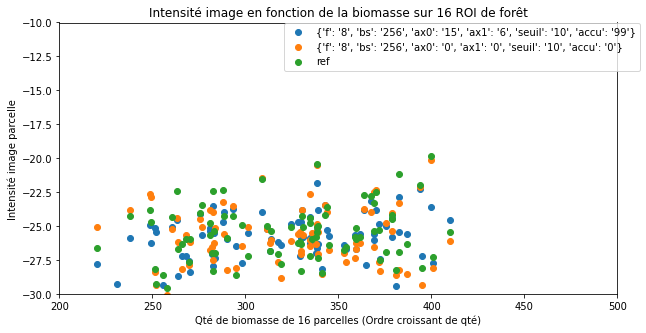


---------------------------------------------

 
 Coefs de pearson :
[('ax0', '15'), ('ax1', '6'), ('f', '8')] (0.2881159140796221, 0.007496992037519487)
[('ax0', '0'), ('ax1', '0'), ('f', '8')] (0.07866694930643074, 0.4742106250188373)
ref (0.1883373984729993, 0.08431876460904651)


In [25]:
main(85)

Liste des résulats disponibles 

0 - 8f_256bs_15sx_6sy_10seuil_99accu.npy
1 - 8f_256bs_15sx_15sy_10seuil_89accu.npy
2 - 8f_256bs_0sx_0sy_10seuil_0accu.npy
3 - band1_new.npy
4 - 4f_256bs_15sx_15sy_10seuil_88accu.npy
5 - 20f_256bs_15sx_15sy_10seuil_89accu.npy
6 - 4f_256bs_15sx_15sy_10seuil_91accu.npy
7 - 3f_256bs_15sx_15sy_10seuil_91accu.npy
8 - 3f_256bs_15sx_15sy_10seuil_95accu.npy
9 - 4f_256bs_15sx_15sy_10seuil_83accu.npy
10 - 2f_256bs_15sx_15sy_10seuil_95accu.npy
11 - 3f_256bs_15sx_15sy_10seuil_100accu.npy
12 - 2f_256bs_15sx_15sy_10seuil_66accu.npy
13 - 2f_256bs_15sx_15sy_10seuil_80accu.npy
14 - 2f_256bs_15sx_15sy_10seuil_79accu.npy
15 - *2f_256bs_15sx_15sy_10seuil_54accu.npy
16 - samedi
17 - zone_foret_old
18 - image_totale

 ## Pour mettre fin à la sélection, appuyer sur entré sans entrer de numéro ##

Selection : 0
8f_256bs_15sx_6sy_10seuil_99accu.npy
Selection : 2
8f_256bs_0sx_0sy_10seuil_0accu.npy
Selection : 
['8f_256bs_15sx_6sy_10seuil_99accu.npy', '8f_256bs_0sx_0sy_10seuil_0ac

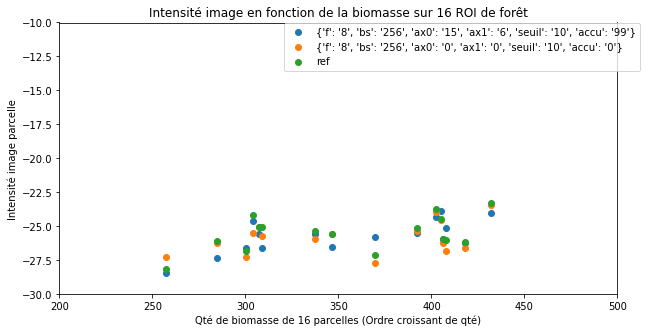


---------------------------------------------

 
 Coefs de pearson :
[('ax0', '15'), ('ax1', '6'), ('f', '8')] (0.6820054882166233, 0.0036117650508625467)
[('ax0', '0'), ('ax1', '0'), ('f', '8')] (0.4116262417887083, 0.11316711149007118)
ref (0.4501743001905987, 0.0801643106061066)


In [26]:
main(16)

In [ ]:
"""
db en ordonnée
corrélation en fonction du log10 de la biomasse
Appliquer à toute une image (déplacement élastique)
"""

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


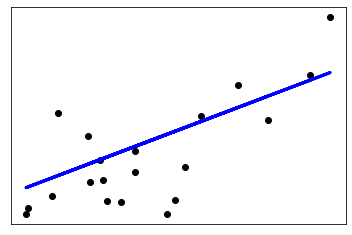

In [8]:


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [ ]:
regr.predict(diabetes_X_test)